In [3]:
import layoutparser as lp
import cv2

In [10]:
image = cv2.imread("im0.jpg")
image = image[..., ::-1] 

In [9]:
from google.colab import files
uploaded = files.upload()

Saving im0.jpg to im0.jpg


In [40]:
model = lp.Detectron2LayoutModel('lp://PubLayNet/faster_rcnn_R_50_FPN_3x/config', 
                                 extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.85],
                                 label_map={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"})

  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


In [41]:
layout = model.detect(image)

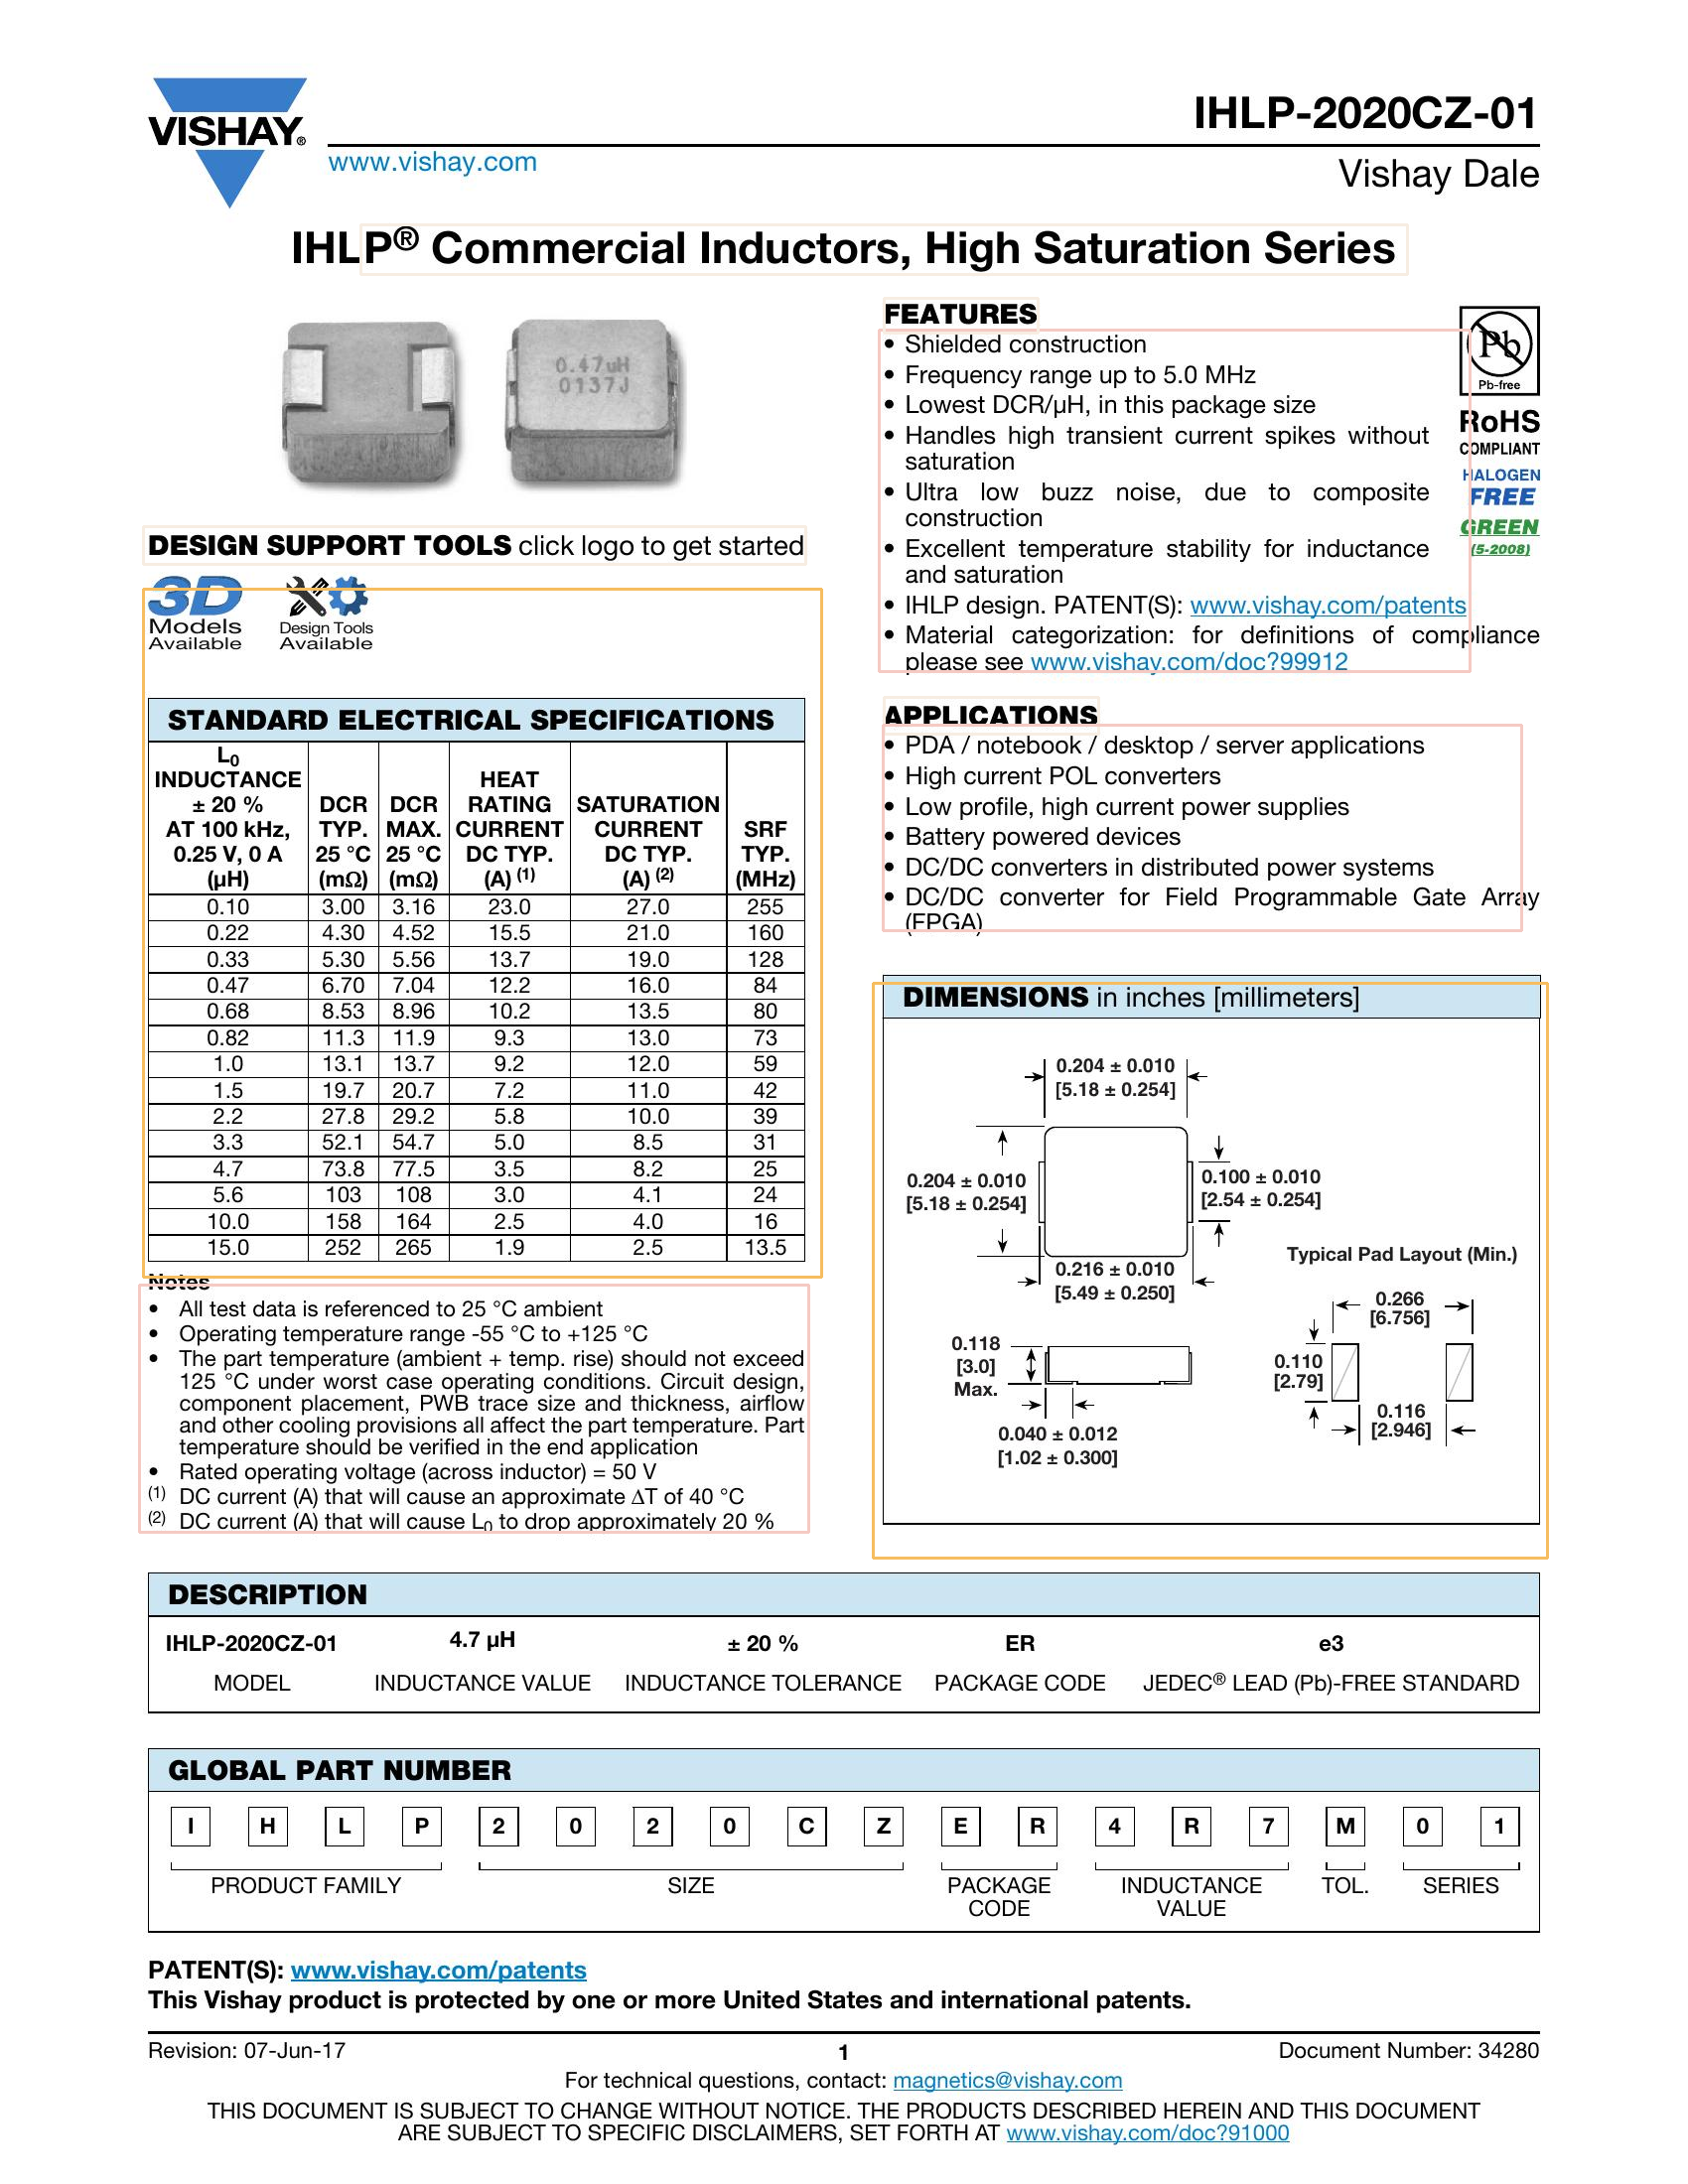

In [42]:
lp.draw_box(image, layout, box_width=3)

In [24]:
text_blocks = lp.Layout([b for b in layout if b.type=='Text'])
figure_blocks = lp.Layout([b for b in layout if b.type=='Figure'])
list_blocks = lp.Layout([b for b in layout if b.type=='List'])

In [17]:
text_blocks = lp.Layout([b for b in text_blocks \
                   if not any(b.is_in(b_fig) for b_fig in figure_blocks)])

In [18]:
h, w = image.shape[:2]

left_interval = lp.Interval(0, w/2*1.05, axis='x').put_on_canvas(image)

left_blocks = text_blocks.filter_by(left_interval, center=True)
left_blocks.sort(key = lambda b:b.coordinates[1], inplace=True)
# The b.coordinates[1] corresponds to the y coordinate of the region
# sort based on that can simulate the top-to-bottom reading order 
right_blocks = lp.Layout([b for b in text_blocks if b not in left_blocks])
right_blocks.sort(key = lambda b:b.coordinates[1], inplace=True)

# And finally combine the two lists and add the index
text_blocks = lp.Layout([b.set(id = idx) for idx, b in enumerate(left_blocks + right_blocks)])

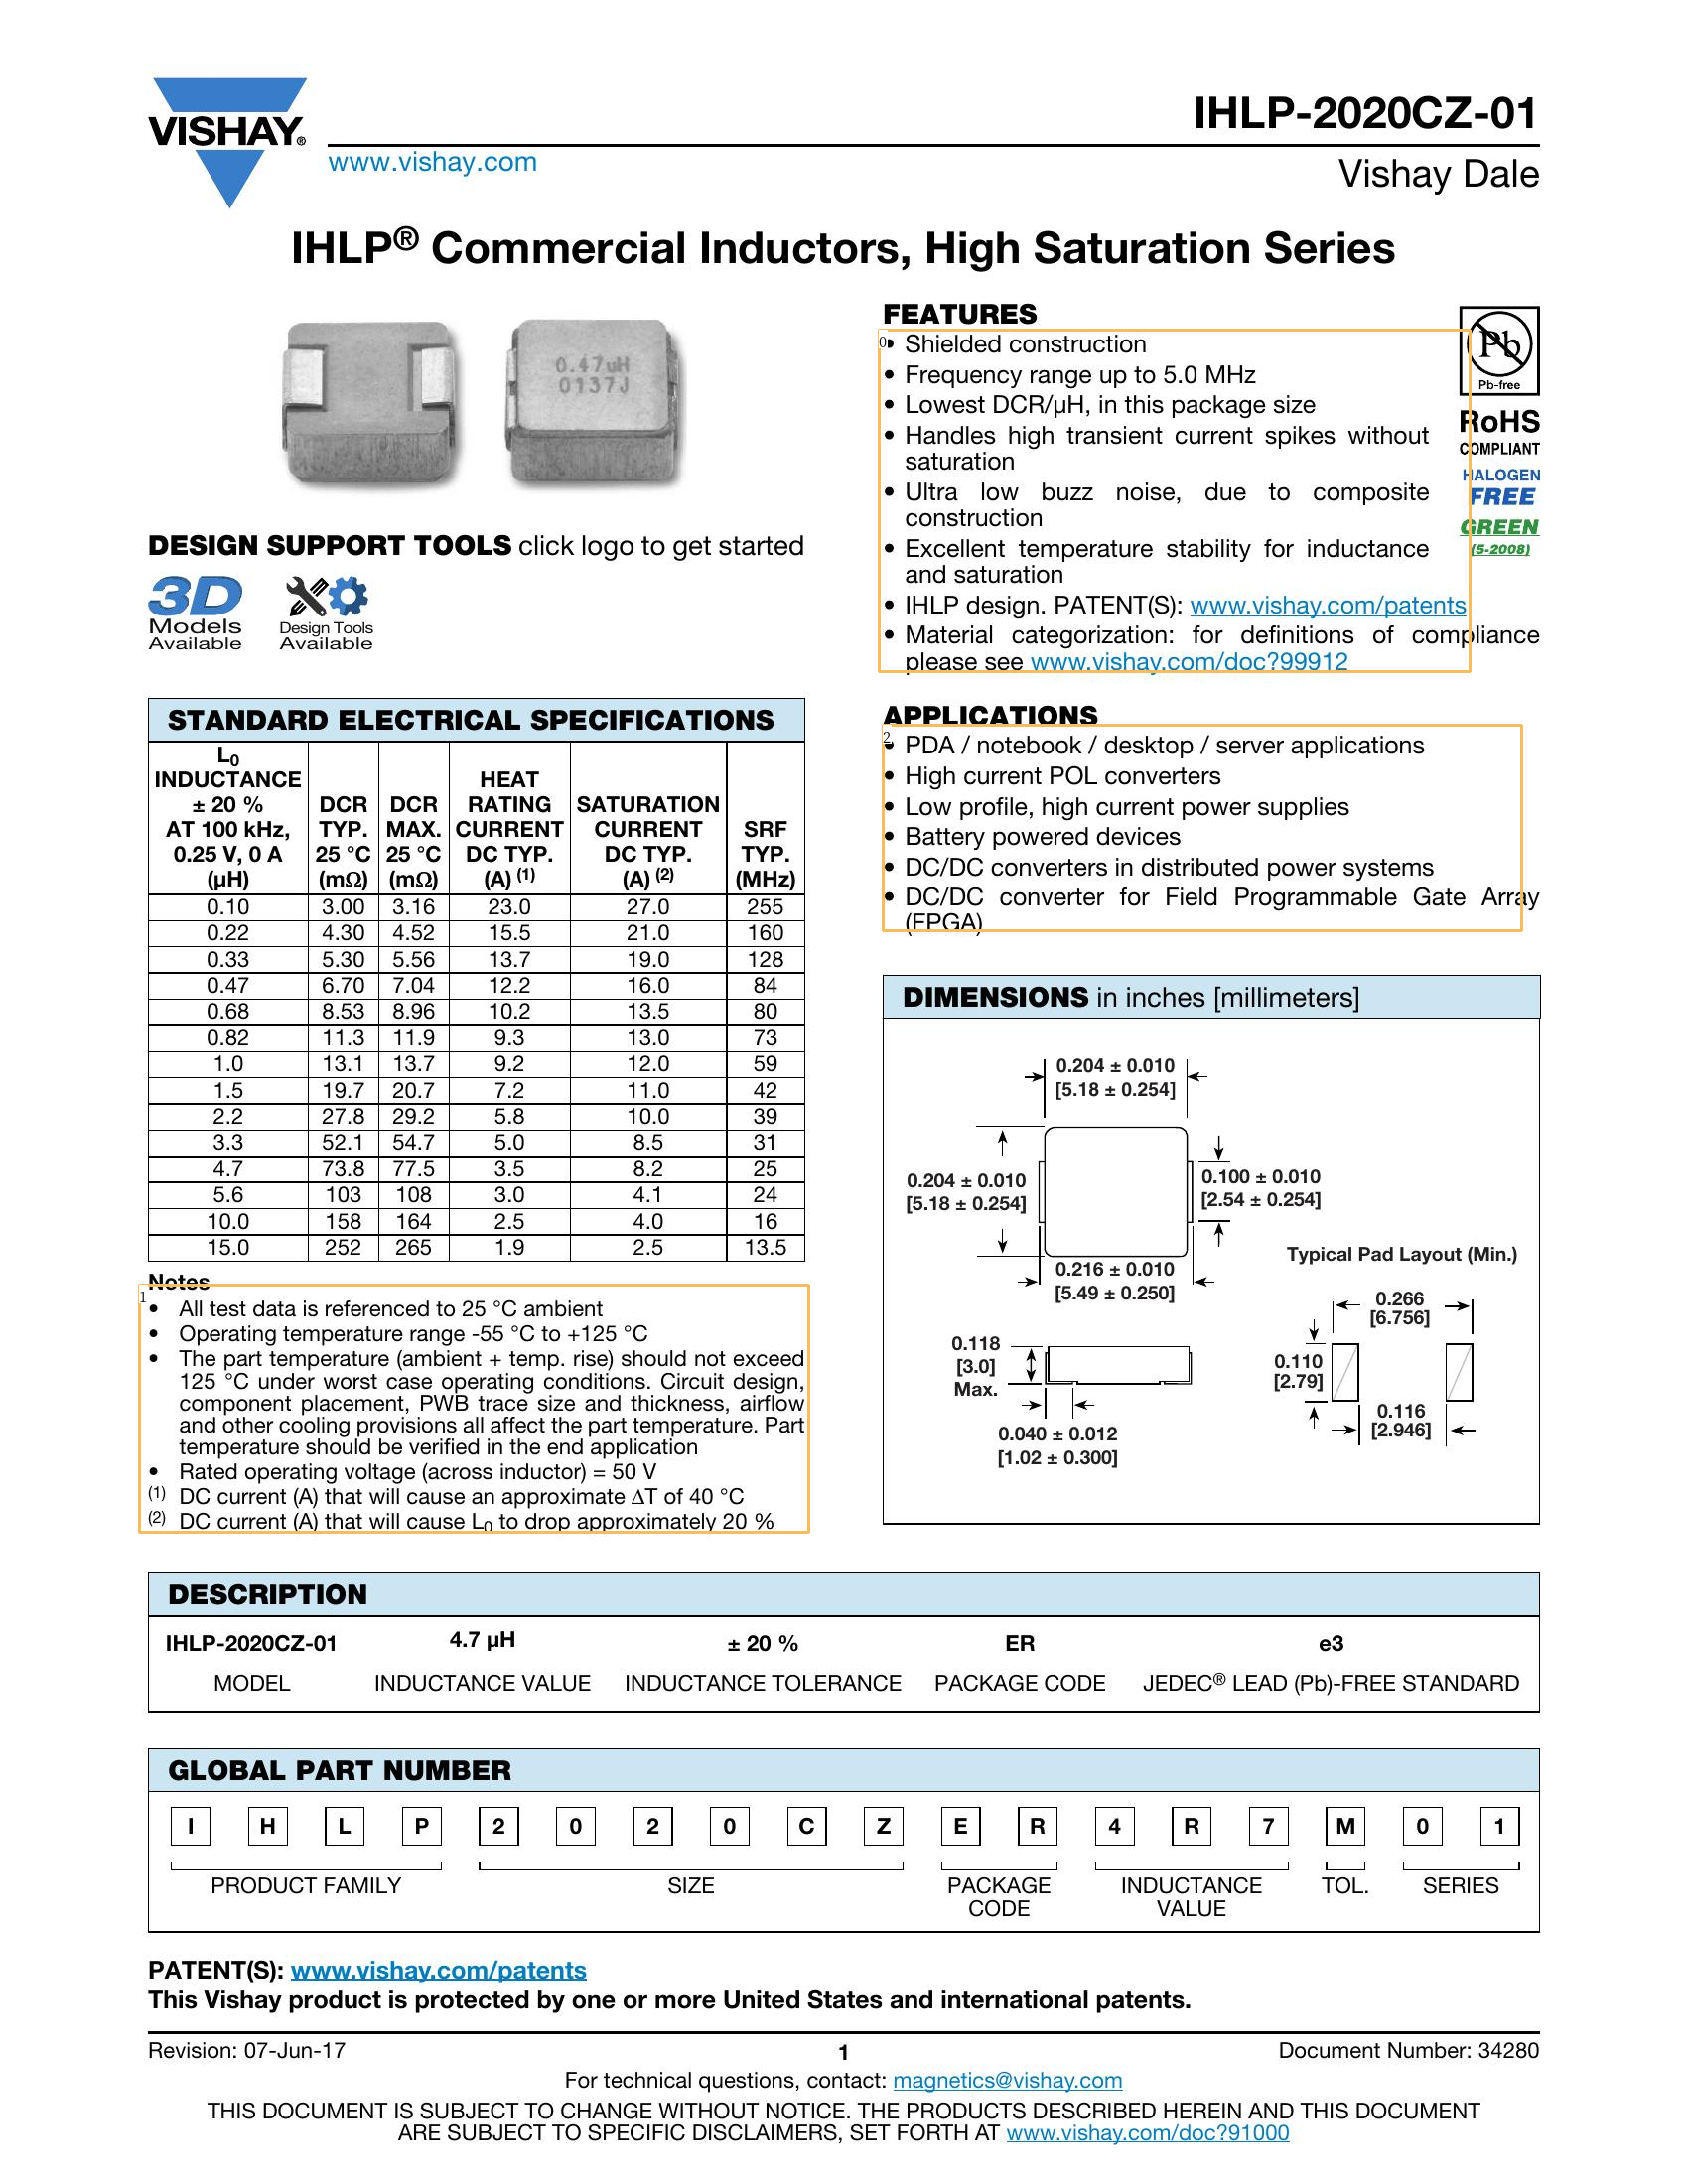

In [25]:
lp.draw_box(image, list_blocks,
            box_width=3, 
            show_element_id=True)